# Understanding Patient Attendance: An Exploratory Data Analysis of Hospital Show/No-Show Patterns

## Introduction  
The success of healthcare services largely depends on patients attending their scheduled appointments. However, missed appointments (no-shows) are a common challenge faced by hospitals, leading to inefficiencies, increased costs, and potential risks to patient health. This exploratory data analysis (EDA) aims to uncover patterns and factors associated with patient attendance and no-shows in a hospital setting, using data of couple of months for the year 2016.

In [1]:
# import packages
import numpy as np #For scientific computing
import pandas as pd #For data manipulation 
import matplotlib.pyplot as plt #For data visualization 
import seaborn as sns #For more advamced data visualization 

## Data Overview
The dataset includes patient information, appointment details, and whether the patient showed up for their appointment. The analysis begins with a thorough inspection of the data to understand its structure, check for missing values, and identify any potential data quality issues.

In [2]:
df = pd.read_csv(r"C:/Users/lkaur/Downloads/hospital_ds/patient_ds_2016.csv") #change this to the location of your file

### Shape and Structure: 
We start by checking the shape of the dataset, the column names, and the data types.
In the description we see age is negative, we will correct that in the following steps.

In [3]:
def check_df(dataframe):
    print("*********Shape*********")
    print(dataframe.shape)
    print("*********Column names*********")
    print(dataframe.columns)
    print("*********Datatypes*********")
    print(dataframe.dtypes)
    print("*********Head*********")
    print(dataframe.head())
    print("*********Tail*********")
    print(dataframe.tail())
    print("*********Description*********")
    print(dataframe.describe())


check_df(df)

*********Shape*********
(110527, 14)
*********Column names*********
Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')
*********Datatypes*********
PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object
*********Head*********
      PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+1

### Missing Values and Duplicates: 
We then assess the presence of missing values and duplicate records that could affect our analysis.

In [4]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [5]:
df.duplicated().sum()

0

### Data Preparation: 
- Key columns like PatientId and AppointmentID are converted to string data types for proper identification.
- Date columns are cleaned by removing time elements
- New features such as Weekday are created to indicate if the appointment was on a weekday or weekend.

In [6]:
# Convert ID variables into objects
df[["PatientId", "AppointmentID"]] = df[["PatientId", "AppointmentID"]].astype(str)
# Deleting the time and keeping the date only
for col in ["AppointmentDay", "ScheduledDay"]:
    df[col] = df[col].apply(lambda x: x.split("T")[0])
# Converting date variables from object to datetime
for col in ["ScheduledDay", "AppointmentDay"]:
    df[col] = pd.to_datetime(df[col])
# Add a new column to indicate if the appointment day is a weekday or weekend
df['Weekday'] = df['AppointmentDay'].apply(lambda x: 0 if x.weekday() >= 5 else 1)

### Data Cleaning
To ensure the analysis is based on accurate data, several cleaning steps are taken:
- Re-labeling the No-Show column and encoding it to a binary numerical column with 0 for No-Show and 1 for Show.
- Re-labeling the Gender column and encoding it to a binary numerical column with 0 for Female and 1 for Male.
- Age Corrections: A negative age value is identified, suggesting a data entry error, and is subsequently removed.
- Wait Days: A crucial feature, Wait_days, is calculated as the difference between the appointment day and the scheduled day. Rows with unreasonable negative wait times are dropped to maintain data integrity.

In [7]:
#Cleaning the No show column
df.rename(columns = {"No-show": "Show"}, inplace = True)
#encoding it
labels = {"No": 1, "Yes":0}
df["Show"] = df["Show"].map(labels)
#converting it into integer
df["Show"] = df["Show"].astype(int)

#Cleaning the Gender column
df.rename(columns = {"Gender": "Male"}, inplace = True)
#encoding it
labels = {"M": 1, "F":0}
df["Male"] = df["Male"].map(labels)
#converting it into integer
df["Male"] = df["Male"].astype(int)

In [8]:
#Removing those rows from dataframe where age is in negatice
df=df[df["Age"] >= 0]

In [9]:
#Creating Age bins and Wait days column
df["Age_bins"] = pd.qcut(df.Age, 5, labels = ["0 - 12", "13 - 29", "30 - 44", "45 - 58", "59 - 115"])
df["diabetic_hiper"] = df["Diabetes"] * df["Hipertension"]
df["Wait_days"] = df["AppointmentDay"] - df["ScheduledDay"]
df["Wait_days"] = df["Wait_days"].astype(str)
df["Wait_days"] = df["Wait_days"].apply(lambda x: x.split(" ")[0])
df["Wait_days"] = df["Wait_days"].astype(int)

# Removing unreasonable wait days
drop_index = df[df["Wait_days"] < 0].index
df.drop(drop_index, inplace = True)
df[df["Wait_days"] < 0]

,PatientId,AppointmentID,Male,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show,Weekday,Age_bins,diabetic_hiper,Wait_days


In [10]:
#Converting wait days into wait bins
df["Wait_days"] = pd.cut(df["Wait_days"], 10, labels = ["0-17", "18-34", "35-53", "54-71", "72-89", "90-106", "107-124", "125-142", "143-160", "161-179"])

### Describing the dataset to understand the numerical values

In [45]:
df.describe()

,Male,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show,Weekday,diabetic_hiper
count,110521.000000,110521,110521,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000
mean,0.350024,2016-05-08 20:32:53.272047872,2016-05-19 00:58:20.684937472,37.089386,0.098271,0.197257,0.071869,0.030401,0.022231,0.321043,0.798102,0.999647,0.058686
min,0.000000,2015-11-10 00:00:00,2016-04-29 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2016-04-29 00:00:00,2016-05-09 00:00:00,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
50%,0.000000,2016-05-10 00:00:00,2016-05-18 00:00:00,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,1.000000,2016-05-20 00:00:00,2016-05-31 00:00:00,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,2016-06-08 00:00:00,2016-06-08 00:00:00,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000
std,0.476979,NaN,NaN,23.109885,0.297682,0.397929,0.258272,0.171690,0.161494,0.466879,0.401419,0.018782,0.235037


**Findings**
- Mean Age: The average age of patients is 37 years. This suggests that the patient population is relatively young to middle-aged, which might influence the types of medical conditions and the likelihood of showing up for appointments.
- Gender Distribution: 35% of the patients are male. This indicates a higher proportion of female patients, which could be due to various factors such as health-seeking behavior or the type of services offered.
- Scholarship Recipients: 9.8% of the patients have a scholarship. This might indicate a segment of the population that is economically disadvantaged and possibly receives financial aid for healthcare.
- Hypertension: 19.7% of patients have high blood pressure. This is a significant portion, suggesting that hypertension is a common health issue in this patient population.
- Diabetes: 7.2% of patients are diabetic. This figure is lower compared to hypertension but still notable, indicating that diabetes is another common condition.
- Alcohol Consumption: Only 3% of patients consume alcohol, which could imply a generally health-conscious population or underreporting.
- Handicap: 2.2% of patients are handicapped. This is a small percentage, indicating that most patients do not have physical disabilities.
- Comorbidity (Diabetes & Hypertension): 5.9% of patients are both diabetic and hypertensive. This is a critical finding as it highlights a vulnerable group that may require more medical attention.
- SMS Notification: 32.1% of patients received an SMS notification. This suggests that SMS reminders are used, but not for all patients. Understanding the impact of SMS reminders on the show-up rate could be valuable.
- No Show-Up Rate: The overall Show up rate 80%. While relatively high, it still means that 20% of appointments are missed, which could be a significant issue for the hospital in terms of resource allocation and patient care continuity.

## Improving Show-Up Rates:

Now lets explore why patients do not show up. We will analyze if factors like appointment day, patient demographics and health conditions, receiving an SMS etc affects the likelihood of showing up.

### Correlation analysis between features

<class 'pandas.core.frame.DataFrame'>
Index: 110521 entries, 0 to 110526
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110521 non-null  object        
 1   AppointmentID   110521 non-null  object        
 2   Male            110521 non-null  int32         
 3   ScheduledDay    110521 non-null  datetime64[ns]
 4   AppointmentDay  110521 non-null  datetime64[ns]
 5   Age             110521 non-null  int64         
 6   Neighbourhood   110521 non-null  object        
 7   Scholarship     110521 non-null  int64         
 8   Hipertension    110521 non-null  int64         
 9   Diabetes        110521 non-null  int64         
 10  Alcoholism      110521 non-null  int64         
 11  Handcap         110521 non-null  int64         
 12  SMS_received    110521 non-null  int64         
 13  Show            110521 non-null  int32         
 14  Weekday         110521 non-null  int64   

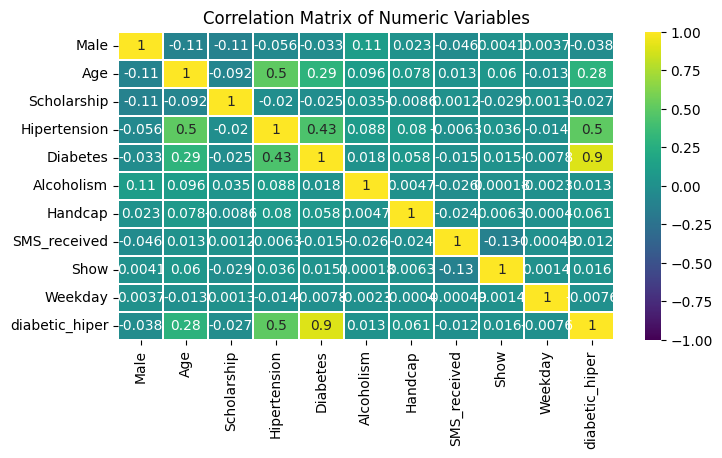

In [13]:
df.info()# Filter only integer columns
df_numeric = df.select_dtypes(include=['int64', 'float64','int32'])

# Compute the correlation matrix
corr_matrix = df_numeric.corr()

# Plot the heatmap
plt.figure(figsize=(8, 4), dpi=100)
sns.heatmap(corr_matrix, vmin=-1, vmax=1, cmap="viridis", linewidths=0.01, annot=True)
plt.title('Correlation Matrix of Numeric Variables')
plt.show()

**Findings**  
Lack of Strong Correlation between the likelihood of a patient showing up for their appointment and any other individual feature in the dataset. This suggests that the decision to show up for an appointment may not be strongly influenced by any single demographic or health characteristic captured in the data.

Mid-Level Positive Correlations:
Between hypertension and age. This is expected, as hypertension is more prevalent among older individuals.
Between diabetes and hypertension. This indicates that patients with one of these conditions are more likely to also have the other, which aligns with medical understanding that these conditions often coexist.

Potential for Interaction Effects:
While individual features do not show a strong correlation with the show-up rate, there may be interaction effects between multiple factors that together influence patient behavior. For instance, age combined with other socio-economic factors might have a more significant impact.

## Deep dive into combinations of features if they influence Patient Show-up

### Deep dive into role of Gender+other features influencing Patient Show-up

In [14]:
# Does Gender+SMS notification play a role in show up?
male_sms_impact = pd.pivot_table(data = df, index = ["Male", "SMS_received"], values = "Show")
round(male_sms_impact * 100, 2) 

Show
Male SMS_received       
0    0             83.48
     1             72.23
1    0             83.00
     1             72.84

In [15]:
# Does Gender+Diabetes play a role in show up?
male_diab_impact = pd.pivot_table(data = df, index = ["Male", "Diabetes"], values = "Show")
round(male_diab_impact * 100, 2) 

Show
Male Diabetes       
0    0         79.50
     1         81.86
1    0         79.89
     1         82.33

In [16]:
# Does Gender+Age play a role in show up?
male_age_impact = pd.pivot_table(data = df, index = ["Male", "Age_bins"], values = "Show")
round(male_age_impact * 100, 2) 

C:\Users\lkaur\AppData\Local\Temp\ipykernel_16508\4025644469.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  male_diab_impact = pd.pivot_table(data = df, index = ["Male", "Age_bins"], values = "Show")


Show
Male Age_bins       
0    0 - 12    79.05
     13 - 29   75.06
     30 - 44   78.65
     45 - 58   82.00
     59 - 115  84.33
1    0 - 12    79.30
     13 - 29   74.78
     30 - 44   78.58
     45 - 58   82.34
     59 - 115  85.45

In [17]:
# Does Gender+Scholarship play a role in show up?
male_diab_impact = pd.pivot_table(data = df, index = ["Male", "Scholarship"], values = "Show")
round(male_diab_impact * 100, 2) 

Show
Male Scholarship       
0    0            80.18
     1            76.21
1    0            80.23
     1            76.49

**Overall Summary:**
- Surprisingly, receiving an SMS reminder appears to have a negative impact on the likelihood of attending an appointment for both genders.
- Diabetes and age (especially older age) are associated with higher show-up rates, suggesting that patients with these characteristics are more likely to attend their appointments regardless of gender.
- Conversely, receiving a scholarship seems to be linked to lower show-up rates, which might indicate financial assistance does not necessarily translate into better attendance.
- Across these factors, the gender differences in show-up rates are relatively minor, with males showing slightly higher rates in most scenarios.

### Deep dive into role of Scholarship +other features influencing Patient Show-up

In [18]:
# The relationship between Show and scholaship
scholar_impact = pd.pivot_table(data = df, index = "Scholarship", values = "Show")
round(scholar_impact * 100, 2) 

,Show
Scholarship,
0,80.20
1,76.26


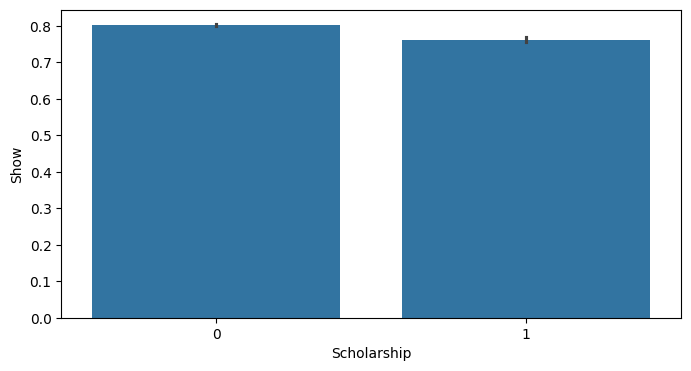

In [19]:
#graph the result
plt.figure(figsize = (8,4), dpi = 100)
sns.barplot(x=df.Scholarship, y=df.Show)
plt.show()


In [20]:
# Does Scholarship+Age play a role in show up?
scholar_age_impact = pd.pivot_table(data = df, index = ["Scholarship", "Age_bins"], values = "Show")
round(scholar_age_impact * 100, 2)

C:\Users\lkaur\AppData\Local\Temp\ipykernel_16508\1671637494.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  scholar_age_impact = pd.pivot_table(data = df, index = ["Scholarship", "Age_bins"], values = "Show")


Show
Scholarship Age_bins       
0           0 - 12    79.39
            13 - 29   75.38
            30 - 44   79.06
            45 - 58   82.32
            59 - 115  84.71
1           0 - 12    77.32
            13 - 29   72.21
            30 - 44   76.32
            45 - 58   79.36
            59 - 115  84.12

In [21]:
# Does Scholarship+Hipertension play a role in show up?
scholar_hiper_impact = pd.pivot_table(data = df, index = ["Scholarship", "Hipertension"], values = "Show")
round(scholar_hiper_impact * 100, 2) 

Show
Scholarship Hipertension       
0           0             79.51
            1             82.93
1           0             75.43
            1             80.25

In [22]:
# Does Scholarship+Diabetes play a role in show up?
scholar_diab_impact = pd.pivot_table(data = df, index = ["Scholarship", "Diabetes"], values = "Show")
round(scholar_diab_impact * 100, 2) 

Show
Scholarship Diabetes       
0           0         80.03
            1         82.28
1           0         76.15
            1         78.38

In [23]:
# Does Scholarship+Alcoholism play a role in show up?
scholar_alco_impact = pd.pivot_table(data = df, index = ["Scholarship", "Alcoholism"], values = "Show")
round(scholar_alco_impact * 100, 2)

Show
Scholarship Alcoholism       
0           0           80.16
            1           81.36
1           0           76.49
            1           71.78

**Overall Summary:**
- Receiving a scholarship generally correlates with lower show-up rates across various factors, including age, hypertension, diabetes, and alcoholism.
- Age: Older patients (especially those 59 years and above) consistently show higher rates of attending their appointments, regardless of scholarship status.
- Hypertension and diabetes are associated with higher show-up rates, suggesting that patients with these conditions are more likely to prioritize their health appointments.
- Alcoholism shows mixed effects; it increases show-up rates for patients without a scholarship but significantly reduces it for those with a scholarship. 

### Deep dive into role of Wait Days influencing Patient Show-up

In [30]:
# The relationship between Show and scholaship
wait_impact = pd.pivot_table(data = df, index = "Wait_days", values = "Show")
round(wait_impact * 100, 2) 

C:\Users\lkaur\AppData\Local\Temp\ipykernel_16508\2207558636.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  wait_impact = pd.pivot_table(data = df, index = "Wait_days", values = "Show")


,Show
Wait_days,
0-17,83.32
18-34,66.86
35-53,66.41
54-71,69.52
72-89,68.64
90-106,75.78
107-124,94.12
125-142,56.52
143-160,33.33


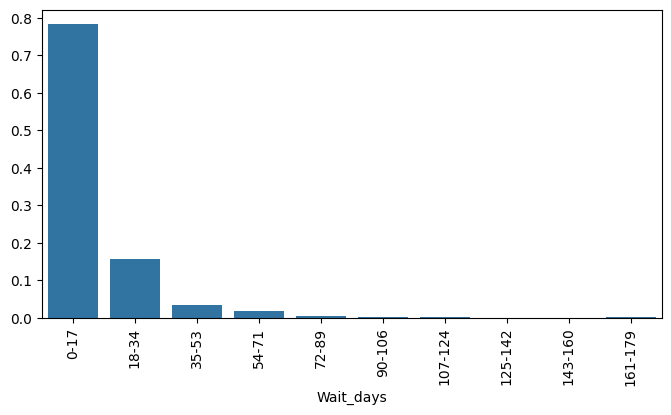

In [31]:
wait_days = df.Wait_days.value_counts(normalize = True).sort_values(ascending = False)[:30]
plt.figure(figsize = (8,4), dpi = 100)
sns.barplot(x = wait_days.index, y = wait_days.values)
plt.xticks(rotation = 90)
plt.show()

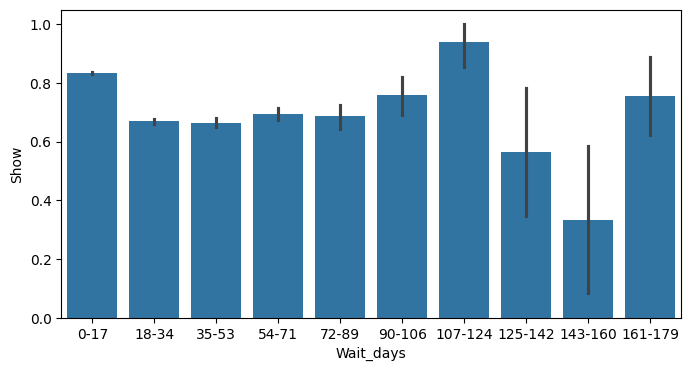

In [32]:
#graph the result
plt.figure(figsize = (8,4), dpi = 100)
sns.barplot(x=df.Wait_days, y=df.Show)
plt.show()

**Findings**
- Keeping the waiting period under 17 days seems ideal for ensuring high patient attendance.
- There is a noticeable decline in attendance starting around 18 days, with a significant drop beyond 125 days, except for a unique spike at 107-124 days (COULD BE OUTLIERS)
- Patient Engagement: The variability in show-up rates at different waiting periods emphasizes wait times not affecting show ups

### Deep dive into role of Weekday/Weekend influencing Patient Show-up

In [38]:
# The relationship between Show and weekday
wait_impact = pd.pivot_table(data = df, index = "Weekday", values = "Show")
round(wait_impact * 100, 2) 

,Show
Weekday,
0,76.92
1,79.81


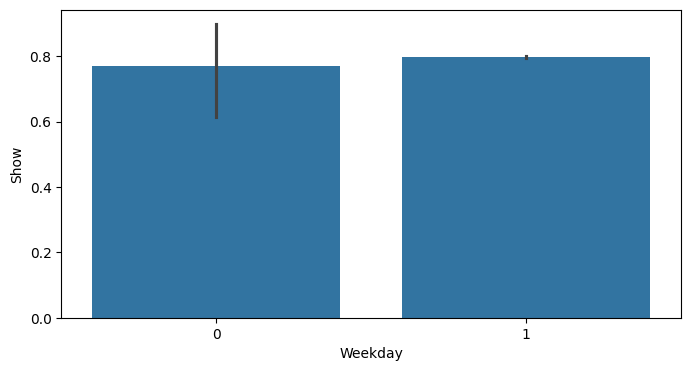

In [39]:
#graph the result
plt.figure(figsize = (8,4), dpi = 100)
sns.barplot(x=df.Weekday, y=df.Show)
plt.show()

In [41]:
#Weekday Scholar Impact
scholar_week_impact = pd.pivot_table(data = df, index = ["Weekday", "Scholarship"], values = "Show")
round(scholar_week_impact * 100, 2)

Show
Weekday Scholarship        
0       0             75.00
        1            100.00
1       0             80.20
        1             76.26

In [37]:
df['Weekday'].value_counts()

Weekday
1    110482
0        39
Name: count, dtype: int64

In [42]:
df['Weekday'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'


Weekday
1    100.0%
0      0.0%
Name: proportion, dtype: object

**Findings**
- The majority of appointments are scheduled on weekdays, where the show-up rates are generally stable regardless of scholarship status, though a slight decrease is observed with scholarships.
- The data shows a perfect show-up rate for scholarship patients on weekends, but the small number of weekend appointments means that further analysis is needed before drawing definitive conclusions. I am assuming that there would be some emergency then only they would be showing up. Scholarships might play a significant role in motivating attendance, especially on weekends.

## Final Comments and Recommendations
Based on the above findings the hospital can do the following for increasing show-up rates:
- The hospital should focus on understanding the personal circumstances and external factors affecting different patient groups since no stromg correlation was found between show ups and any of the other features. 
- Given the unexpected negative impact of SMS reminders, the hospital could re-evaluate the timing, frequency, and content of these reminders. 
- Special attention should be given to older patients and those with chronic conditions like diabetes and hypertension, who already show higher attendance rates. GIve them easy access to appointments.  
- The hospital should assess the effectiveness of its scholarship program. Offering additional support or resources to scholarship recipients might improve their show-up rates, particularly on weekdays.
- To maximize attendance, the hospital should aim to schedule appointments within 17 days of booking. 
- The hospital could consider offering more weekend appointments, particularly for scholarship recipients, given the perfect show-up rate observed. 